# NBA Player Value based on Win-Shares and Salary

In [159]:
#import required packages
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.stats as stats
import sklearn
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
from pandas.core import datetools

%matplotlib inline

### Create Dataframe from csv
#### Last updated 4/7/2019, includes games through 4/6/2019


In [2]:
#creating player stats df from csv
df_stats = pd.read_csv('nba_player_stats-2.csv')

In [3]:
df_stats.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Alex Abrines,SG,25,OKC,31,588,6.3,0.507,0.809,...,7.9,12.2,0.1,0.6,0.7,0.054,-2.5,-1,-3.4,-0.2
1,2,Quincy Acy,PF,28,PHO,10,123,2.9,0.379,0.833,...,15.2,9.2,-0.1,0.1,-0.1,-0.02,-5.6,-0.3,-5.9,-0.1
2,3,Jaylen Adams,PG,22,ATL,32,393,7.9,0.479,0.689,...,19.6,13.7,-0.1,0.2,0.1,0.014,-2.8,-1.5,-4.3,-0.2
3,4,Steven Adams,C,25,OKC,77,2593,18.9,0.596,0.003,...,12.6,16.4,5.1,4,9.1,0.168,0.8,2.2,3,3.3
4,5,Bam Adebayo,C,21,MIA,79,1841,17.8,0.623,0.028,...,17.3,15.6,3.4,3.2,6.6,0.171,-0.5,3.6,3,2.4


## Headers throughout the table are in csv for readability, removing for analysis purposes

In [7]:
df_stats = df_stats.drop(df_stats[(df_stats.Rk == 'Rk')].index)

In [8]:
df_stats.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Alex Abrines,SG,25,OKC,31,588,6.3,0.507,0.809,...,7.9,12.2,0.1,0.6,0.7,0.054,-2.5,-1,-3.4,-0.2
1,2,Quincy Acy,PF,28,PHO,10,123,2.9,0.379,0.833,...,15.2,9.2,-0.1,0.1,-0.1,-0.02,-5.6,-0.3,-5.9,-0.1
2,3,Jaylen Adams,PG,22,ATL,32,393,7.9,0.479,0.689,...,19.6,13.7,-0.1,0.2,0.1,0.014,-2.8,-1.5,-4.3,-0.2
3,4,Steven Adams,C,25,OKC,77,2593,18.9,0.596,0.003,...,12.6,16.4,5.1,4,9.1,0.168,0.8,2.2,3,3.3
4,5,Bam Adebayo,C,21,MIA,79,1841,17.8,0.623,0.028,...,17.3,15.6,3.4,3.2,6.6,0.171,-0.5,3.6,3,2.4


In [9]:
#full definition of all columns can be found at https://www.basketball-reference.com/leagues/NBA_2019_advanced.html
list(df_stats)

['Rk',
 'Player',
 'Pos',
 'Age',
 'Tm',
 'G',
 'MP',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 'OWS',
 'DWS',
 'WS',
 'WS/48',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP']

### View how columns were imported
We need to see what kind of object or type the columns are.

In [10]:
df_stats.dtypes

Rk        object
Player    object
Pos       object
Age       object
Tm        object
G         object
MP        object
PER       object
TS%       object
3PAr      object
FTr       object
ORB%      object
DRB%      object
TRB%      object
AST%      object
STL%      object
BLK%      object
TOV%      object
USG%      object
OWS       object
DWS       object
WS        object
WS/48     object
OBPM      object
DBPM      object
BPM       object
VORP      object
dtype: object

## Casting a column to Float from an Object
This is the quick and easy pandas way of doing it.

In [11]:
# ORB% is an object as noted above now check the coloumn out.
df_stats['ORB%'] = pd.to_numeric(df_stats['ORB%'], errors='coerce')

In [12]:
df_stats.dtypes

Rk         object
Player     object
Pos        object
Age        object
Tm         object
G          object
MP         object
PER        object
TS%        object
3PAr       object
FTr        object
ORB%      float64
DRB%       object
TRB%       object
AST%       object
STL%       object
BLK%       object
TOV%       object
USG%       object
OWS        object
DWS        object
WS         object
WS/48      object
OBPM       object
DBPM       object
BPM        object
VORP       object
dtype: object

### Convert all object to string object
We want to make sure we are working with the right type of strings here.

In [13]:
list_col = df_stats.columns

for col_name in list_col:
    df_stats[col_name] = df_stats[col_name].astype(str) # Cast from Object alone to String Object
    

In [14]:
df_stats.dtypes

Rk        object
Player    object
Pos       object
Age       object
Tm        object
G         object
MP        object
PER       object
TS%       object
3PAr      object
FTr       object
ORB%      object
DRB%      object
TRB%      object
AST%      object
STL%      object
BLK%      object
TOV%      object
USG%      object
OWS       object
DWS       object
WS        object
WS/48     object
OBPM      object
DBPM      object
BPM       object
VORP      object
dtype: object

# Now for the fun part. Convert numerical columns from objects to Numerical Objects.
For the fun part. Finding the list of columns we want as strings,
and convert those we want to numerical columns.

In [61]:

def converted_df(df_stats, list_to_remove=[]):
    
    list_col_names = df_stats.columns
    col_name_to_not_convert = ['Rk', 'Player', 'Pos', 'Tm']

    # This Flnds the difference of the total list of columns and removes the list of names to remain as Strings
    col_name_to_convert = list(set(col_name_to_not_convert)^set(list_col_names))

    print('Columns to convert to Float: \n',col_name_to_convert)

In [62]:
list_col_names = df_stats.columns
col_name_to_not_convert = ['Rk', 'Player', 'Pos', 'Tm']
sothing = ['BLK%', 'DBPM', 'BPM', 'STL%', 'TRB%', 'OWS', 'TS%', 'DRB%', 'FTr', 'AST%', 'WS', 'VORP', 'USG%', 'ORB%', 'PER', 'Age', 'TOV%', 'G', 'WS/48', 'DWS', '3PAr', 'OBPM', 'MP']

# This Flnds the difference of the total list of columns and removes the list of names to remain as Strings
col_name_to_convert = list(set(col_name_to_not_convert)^set(list_col_names))

print('Columns to convert to Float: \n',col_name_to_convert)

('Columns to convert to Float: \n', ['STL%', 'DWS', 'G', 'TOV%', 'Age', 'VORP', 'BPM', 'AST%', 'PER', 'WS', 'ORB%', 'BLK%', 'FTr', 'WS/48', 'DBPM', 'USG%', 'DRB%', 'TS%', 'OBPM', '3PAr', 'TRB%', 'OWS', 'MP'])


## Now convert the ojects to Numerical objects.
This website may help you to understand the used cases of how to cast columns.
https://pbpython.com/pandas_dtypes.html

In [63]:
for col_name in col_name_to_convert:
    df_stats[col_name] = pd.to_numeric(df_stats[col_name], errors='coerce')

In [64]:
df_stats.dtypes

Rk         object
Player     object
Pos        object
Age       float64
Tm         object
G         float64
MP        float64
PER       float64
TS%       float64
3PAr      float64
FTr       float64
ORB%      float64
DRB%      float64
TRB%      float64
AST%      float64
STL%      float64
BLK%      float64
TOV%      float64
USG%      float64
OWS       float64
DWS       float64
WS        float64
WS/48     float64
OBPM      float64
DBPM      float64
BPM       float64
VORP      float64
dtype: object

In [65]:
df_stats.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,alex abrines,SG,25.0,OKC,31.0,588.0,6.3,0.507,0.809,...,7.9,12.2,0.1,0.6,0.7,0.054,-2.5,-1.0,-3.4,-0.2
1,2,quincy acy,PF,28.0,PHO,10.0,123.0,2.9,0.379,0.833,...,15.2,9.2,-0.1,0.1,-0.1,-0.020,-5.6,-0.3,-5.9,-0.1
2,3,jaylen adams,PG,22.0,ATL,32.0,393.0,7.9,0.479,0.689,...,19.6,13.7,-0.1,0.2,0.1,0.014,-2.8,-1.5,-4.3,-0.2
3,4,steven adams,C,25.0,OKC,77.0,2593.0,18.9,0.596,0.003,...,12.6,16.4,5.1,4.0,9.1,0.168,0.8,2.2,3.0,3.3
4,5,bam adebayo,C,21.0,MIA,79.0,1841.0,17.8,0.623,0.028,...,17.3,15.6,3.4,3.2,6.6,0.171,-0.5,3.6,3.0,2.4


In [18]:
df_contract = pd.read_csv('nba_player_contracts1.csv', index_col=False)
df_contract.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Salary,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Rk,Player,Tm,year0,year1,year2,year3,year4,year5,Signed Using,Guaranteed
1,1,Stephen Curry,GSW,37457154,40231758,43006362,45780966,NaN,NaN,Bird Rights,166476240
2,2,Chris Paul,HOU,35654150,38506482,41358814,44211146,NaN,NaN,NaN,159730592
3,3,Russell Westbrook,OKC,35654150,38178000,41006000,43848000,46662000,NaN,Bird Rights,158686150
4,4,LeBron James,LAL,35654150,37436858,39219565,41002273,NaN,NaN,NaN,113310573


In [19]:
df_col_name = list(df_contract.iloc[0])
print(df_col_name)

['Rk', 'Player', 'Tm', 'year0', 'year1', 'year2', 'year3', 'year4', 'year5', 'Signed Using', ' Guaranteed ']


In [20]:
df_contract.columns = df_col_name
df_contract.head()

,Rk,Player,Tm,year0,year1,year2,year3,year4,year5,Signed Using,Guaranteed
0,Rk,Player,Tm,year0,year1,year2,year3,year4,year5,Signed Using,Guaranteed
1,1,Stephen Curry,GSW,37457154,40231758,43006362,45780966,NaN,NaN,Bird Rights,166476240
2,2,Chris Paul,HOU,35654150,38506482,41358814,44211146,NaN,NaN,NaN,159730592
3,3,Russell Westbrook,OKC,35654150,38178000,41006000,43848000,46662000,NaN,Bird Rights,158686150
4,4,LeBron James,LAL,35654150,37436858,39219565,41002273,NaN,NaN,NaN,113310573


In [21]:
df_contract.drop(df_contract.head(1).index, inplace=True)
df_contract.head()

,Rk,Player,Tm,year0,year1,year2,year3,year4,year5,Signed Using,Guaranteed
1,1,Stephen Curry,GSW,37457154,40231758,43006362,45780966,NaN,NaN,Bird Rights,166476240
2,2,Chris Paul,HOU,35654150,38506482,41358814,44211146,NaN,NaN,NaN,159730592
3,3,Russell Westbrook,OKC,35654150,38178000,41006000,43848000,46662000,NaN,Bird Rights,158686150
4,4,LeBron James,LAL,35654150,37436858,39219565,41002273,NaN,NaN,NaN,113310573
5,5,Blake Griffin,DET,32088932,34234964,36595996,38957028,NaN,NaN,Bird Rights,102919892


In [22]:
df_contract['Player'] = df_contract['Player'].str.lower()

In [23]:
df_contract.head()

,Rk,Player,Tm,year0,year1,year2,year3,year4,year5,Signed Using,Guaranteed
1,1,stephen curry,GSW,37457154,40231758,43006362,45780966,NaN,NaN,Bird Rights,166476240
2,2,chris paul,HOU,35654150,38506482,41358814,44211146,NaN,NaN,NaN,159730592
3,3,russell westbrook,OKC,35654150,38178000,41006000,43848000,46662000,NaN,Bird Rights,158686150
4,4,lebron james,LAL,35654150,37436858,39219565,41002273,NaN,NaN,NaN,113310573
5,5,blake griffin,DET,32088932,34234964,36595996,38957028,NaN,NaN,Bird Rights,102919892


In [24]:
df_stats['Player'] = df_stats['Player'].str.lower()
df_stats.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,alex abrines,SG,25,OKC,31,588,6.3,0.507,0.809,...,7.9,12.2,0.1,0.6,0.7,0.054,-2.5,-1,-3.4,-0.2
1,2,quincy acy,PF,28,PHO,10,123,2.9,0.379,0.833,...,15.2,9.2,-0.1,0.1,-0.1,-0.02,-5.6,-0.3,-5.9,-0.1
2,3,jaylen adams,PG,22,ATL,32,393,7.9,0.479,0.689,...,19.6,13.7,-0.1,0.2,0.1,0.014,-2.8,-1.5,-4.3,-0.2
3,4,steven adams,C,25,OKC,77,2593,18.9,0.596,0.003,...,12.6,16.4,5.1,4,9.1,0.168,0.8,2.2,3,3.3
4,5,bam adebayo,C,21,MIA,79,1841,17.8,0.623,0.028,...,17.3,15.6,3.4,3.2,6.6,0.171,-0.5,3.6,3,2.4


In [25]:
df_full_data = pd.merge(df_stats, df_contract, on='Player', how='outer')

In [66]:
# Now it is merged
df_full_data.head(10)

,Rk_x,Player,Pos,Age,Tm_x,G,MP,PER,TS%,3PAr,...,Rk_y,Tm_y,year0,year1,year2,year3,year4,year5,Signed Using,Guaranteed
0,1,alex abrines,SG,25,OKC,31,588,6.3,0.507,0.809,...,200,OKC,5455236,NaN,NaN,NaN,NaN,NaN,NaN,5455236
1,2,quincy acy,PF,28,PHO,10,123,2.9,0.379,0.833,...,509,PHO,213949,NaN,NaN,NaN,NaN,NaN,NaN,213949
2,3,jaylen adams,PG,22,ATL,32,393,7.9,0.479,0.689,...,508,ATL,236854,1416852,NaN,NaN,NaN,NaN,NaN,236854
3,4,steven adams,C,25,OKC,77,2593,18.9,0.596,0.003,...,28,OKC,24157304,25842697,27528090,NaN,NaN,NaN,1st Round Pick,77528091
4,5,bam adebayo,C,21,MIA,79,1841,17.8,0.623,0.028,...,272,MIA,2955840,3454080,5115492,NaN,NaN,NaN,1st Round Pick,6409920
5,6,deng adel,SF,21,CLE,17,187,1.7,0.376,0.629,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,devaughn akoon-purcell,SG,25,DEN,7,22,8.2,0.322,0.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,lamarcus aldridge,C,33,SAS,79,2621,22.7,0.573,0.031,...,38,SAS,22347015,26000000,24000000,NaN,NaN,NaN,Cap Space,55347015
8,9,rawle alkins,SG,21,CHI,8,88,9.4,0.417,0.344,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,grayson allen,SG,23,UTA,35,347,6.1,0.514,0.589,...,338,UTA,2074320,2429400,2545320,4054695,NaN,NaN,1st Round Pick,4503720


In [28]:
df_full_data.to_csv('nba_full_dataframe.csv', index=False)

### Check the datatypes of the columns and begin the process of converting to the correct file type

In [70]:
df = df_full_data


In [71]:
df.dtypes

Rk_x            object
Player          object
Pos             object
Age             object
Tm_x            object
G               object
MP              object
PER             object
TS%             object
3PAr            object
FTr             object
ORB%            object
DRB%            object
TRB%            object
AST%            object
STL%            object
BLK%            object
TOV%            object
USG%            object
OWS             object
DWS             object
WS              object
WS/48           object
OBPM            object
DBPM            object
BPM             object
VORP            object
Rk_y            object
Tm_y            object
year0           object
year1           object
year2           object
year3           object
year4           object
year5           object
Signed Using    object
 Guaranteed     object
dtype: object

In [78]:
# Here we must convert dtypes for merged df

def converted_df(df, list_to_remove=[]):
    
    list_col_names = df_stats.columns
    col_name_to_not_convert = ['Rk_x', 'Player', 'Pos', 'Tm_x', 'Rk_y','Tm_y','Signed Using']

    # This Flnds the difference of the total list of columns and removes the list of names to remain as Strings
    col_name_to_convert = list(set(col_name_to_not_convert)^set(list_col_names))

    print('Columns to convert to Float: \n',col_name_to_convert)

In [75]:
list_col_names = df.columns
col_name_to_not_convert = ['Rk_x', 'Player', 'Pos', 'Tm_x', 'Rk_y','Tm_y','Signed Using']
sothing = ['BLK%', 'DBPM', 'BPM', 'STL%', 'TRB%', 'OWS', 'TS%', 'DRB%', 'FTr', 'AST%', 'WS', 'VORP', 'USG%', 'ORB%', 'PER', 'Age', 'TOV%', 'G', 'WS/48', 'DWS', '3PAr', 'OBPM', 'MP', 'year0', 'year1', 'year2', 'year3', 'year4', 'year5', 'Guaranteed']

# This Flnds the difference of the total list of columns and removes the list of names to remain as Strings
col_name_to_convert = list(set(col_name_to_not_convert)^set(list_col_names))

print('Columns to convert to Float: \n',col_name_to_convert)

('Columns to convert to Float: \n', ['STL%', 'BPM', 'PER', 'WS', 'ORB%', 'BLK%', 'DBPM', 'OBPM', '3PAr', 'OWS', 'DWS', 'G', 'year4', 'year5', 'Age', 'VORP', 'year0', 'AST%', 'year2', 'year1', 'TRB%', 'year3', 'TOV%', 'FTr', 'WS/48', ' Guaranteed ', 'USG%', 'DRB%', 'TS%', 'MP'])


In [76]:
for col_name in col_name_to_convert:
    df[col_name] = pd.to_numeric(df[col_name], errors='coerce')

In [77]:
df.dtypes

Rk_x             object
Player           object
Pos              object
Age             float64
Tm_x             object
G               float64
MP              float64
PER             float64
TS%             float64
3PAr            float64
FTr             float64
ORB%            float64
DRB%            float64
TRB%            float64
AST%            float64
STL%            float64
BLK%            float64
TOV%            float64
USG%            float64
OWS             float64
DWS             float64
WS              float64
WS/48           float64
OBPM            float64
DBPM            float64
BPM             float64
VORP            float64
Rk_y             object
Tm_y             object
year0           float64
year1           float64
year2           float64
year3           float64
year4           float64
year5           float64
Signed Using     object
 Guaranteed     float64
dtype: object

### Let's explore the data further 

In [83]:
df.head(25)

,Rk_x,Player,Pos,Age,Tm_x,G,MP,PER,TS%,3PAr,...,Rk_y,Tm_y,year0,year1,year2,year3,year4,year5,Signed Using,Guaranteed
0,1,alex abrines,SG,25.0,OKC,31.0,588.0,6.3,0.507,0.809,...,200,OKC,5455236.0,NaN,NaN,NaN,NaN,NaN,NaN,5455236.0
1,2,quincy acy,PF,28.0,PHO,10.0,123.0,2.9,0.379,0.833,...,509,PHO,213949.0,NaN,NaN,NaN,NaN,NaN,NaN,213949.0
2,3,jaylen adams,PG,22.0,ATL,32.0,393.0,7.9,0.479,0.689,...,508,ATL,236854.0,1416852.0,NaN,NaN,NaN,NaN,NaN,236854.0
3,4,steven adams,C,25.0,OKC,77.0,2593.0,18.9,0.596,0.003,...,28,OKC,24157304.0,25842697.0,27528090.0,NaN,NaN,NaN,1st Round Pick,77528091.0
4,5,bam adebayo,C,21.0,MIA,79.0,1841.0,17.8,0.623,0.028,...,272,MIA,2955840.0,3454080.0,5115492.0,NaN,NaN,NaN,1st Round Pick,6409920.0
5,6,deng adel,SF,21.0,CLE,17.0,187.0,1.7,0.376,0.629,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,devaughn akoon-purcell,SG,25.0,DEN,7.0,22.0,8.2,0.322,0.400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,lamarcus aldridge,C,33.0,SAS,79.0,2621.0,22.7,0.573,0.031,...,38,SAS,22347015.0,26000000.0,24000000.0,NaN,NaN,NaN,Cap Space,55347015.0
8,9,rawle alkins,SG,21.0,CHI,8.0,88.0,9.4,0.417,0.344,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,grayson allen,SG,23.0,UTA,35.0,347.0,6.1,0.514,0.589,...,338,UTA,2074320.0,2429400.0,2545320.0,4054695.0,NaN,NaN,1st Round Pick,4503720.0


In [85]:
print(len(df))

1619


In [89]:
print(df.isnull().sum())

Rk_x              82
Player            30
Pos               82
Age              810
Tm_x              82
G                810
MP               810
PER              810
TS%              819
3PAr             820
FTr              820
ORB%             810
DRB%             810
TRB%             810
AST%             810
STL%             810
BLK%             810
TOV%             819
USG%             810
OWS              810
DWS              810
WS               810
WS/48            810
OBPM             810
DBPM             810
BPM              810
VORP             810
Rk_y              87
Tm_y              88
year0            816
year1           1254
year2           1444
year3           1540
year4           1602
year5           1619
Signed Using     424
 Guaranteed      821
dtype: int64


In [90]:
# Let's remove the data that has missing values from 'Age' for now
df1 = df.dropna(subset = ['Age'])

In [91]:
print(df1.isnull().sum())

Rk_x              0
Player            0
Pos               0
Age               0
Tm_x              0
G                 0
MP                0
PER               0
TS%               9
3PAr             10
FTr              10
ORB%              0
DRB%              0
TRB%              0
AST%              0
STL%              0
BLK%              0
TOV%              9
USG%              0
OWS               0
DWS               0
WS                0
WS/48             0
OBPM              0
DBPM              0
BPM               0
VORP              0
Rk_y             58
Tm_y             58
year0            58
year1           466
year2           644
year3           735
year4           794
year5           809
Signed Using    349
 Guaranteed      63
dtype: int64


In [103]:
df1.head(25)

,Rk_x,Player,Pos,Age,Tm_x,G,MP,PER,TS%,3PAr,...,Rk_y,Tm_y,year0,year1,year2,year3,year4,year5,Signed Using,Guaranteed
0,1,alex abrines,SG,25.0,OKC,31.0,588.0,6.3,0.507,0.809,...,200,OKC,5455236.0,NaN,NaN,NaN,NaN,NaN,NaN,5455236.0
1,2,quincy acy,PF,28.0,PHO,10.0,123.0,2.9,0.379,0.833,...,509,PHO,213949.0,NaN,NaN,NaN,NaN,NaN,NaN,213949.0
2,3,jaylen adams,PG,22.0,ATL,32.0,393.0,7.9,0.479,0.689,...,508,ATL,236854.0,1416852.0,NaN,NaN,NaN,NaN,NaN,236854.0
3,4,steven adams,C,25.0,OKC,77.0,2593.0,18.9,0.596,0.003,...,28,OKC,24157304.0,25842697.0,27528090.0,NaN,NaN,NaN,1st Round Pick,77528091.0
4,5,bam adebayo,C,21.0,MIA,79.0,1841.0,17.8,0.623,0.028,...,272,MIA,2955840.0,3454080.0,5115492.0,NaN,NaN,NaN,1st Round Pick,6409920.0
5,6,deng adel,SF,21.0,CLE,17.0,187.0,1.7,0.376,0.629,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,devaughn akoon-purcell,SG,25.0,DEN,7.0,22.0,8.2,0.322,0.400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,lamarcus aldridge,C,33.0,SAS,79.0,2621.0,22.7,0.573,0.031,...,38,SAS,22347015.0,26000000.0,24000000.0,NaN,NaN,NaN,Cap Space,55347015.0
8,9,rawle alkins,SG,21.0,CHI,8.0,88.0,9.4,0.417,0.344,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,grayson allen,SG,23.0,UTA,35.0,347.0,6.1,0.514,0.589,...,338,UTA,2074320.0,2429400.0,2545320.0,4054695.0,NaN,NaN,1st Round Pick,4503720.0


In [33]:
import re

In [110]:
print(len(df1))

809


In [114]:
df2 = df1.dropna(subset = ['year0', 'WS'])

In [115]:
print(len(df2))

751


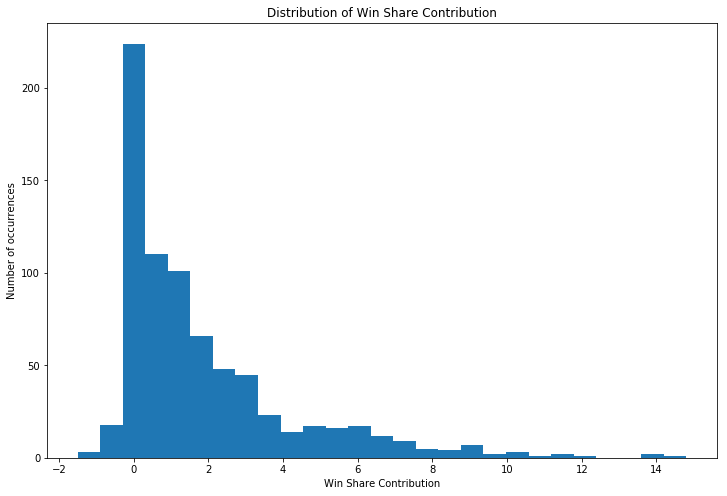

In [152]:
# Let's take a quick glance at the distribution of Win Shares
WS = df2['WS']

n_bins = np.sqrt(len(WS))

n_bins = int(n_bins)

_ = plt.figure(figsize = (12, 8))
_ = plt.hist(WS, bins = n_bins)
_ = plt.xlabel('Win Share Contribution')
_ = plt.ylabel('Number of occurrences')
_ = plt.title('Distribution of Win Share Contribution')

plt.show()

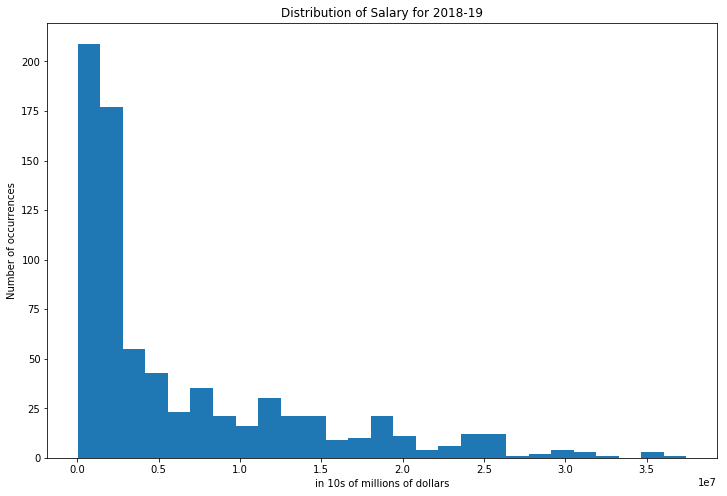

In [154]:
# Quick glance at salary distribution for year0 
salary0 = df2['year0']
n_bins = np.sqrt(len(salary0))
n_bins = int(n_bins)

_ = plt.figure(figsize = (12, 8))
_ = plt.hist(salary0, bins = n_bins)
_ = plt.xlabel('in 10s of millions of dollars')
_ = plt.ylabel('Number of occurrences')
_ = plt.title('Distribution of Salary for 2018-19')

plt.show()

In [127]:
array = np.array(df2[['year0', 'WS']])
print(array)

[[  5.45523600e+06   7.00000000e-01]
 [  2.13949000e+05  -1.00000000e-01]
 [  2.36854000e+05   1.00000000e-01]
 ..., 
 [  1.54495100e+06   3.00000000e+00]
 [  1.54495100e+06   1.80000000e+00]
 [  1.54495100e+06   1.30000000e+00]]


In [129]:
df_array = pd.DataFrame({'Salary':array[:,0],'WS':array[:,1]})
print(df_array)

         Salary    WS
0     5455236.0   0.7
1      213949.0  -0.1
2      236854.0   0.1
3    24157304.0   9.1
4     2955840.0   6.6
5    22347015.0   8.8
6     2074320.0  -0.1
7     2034120.0   7.5
8     6957105.0   5.6
9     2516048.0   0.3
10    8641000.0   2.7
11   20421546.0  -0.2
12   20421546.0  -0.2
13   20421546.0   0.0
14    1378242.0  -0.1
15   24157304.0  14.1
16   25534253.0   0.3
17    2393887.0   0.3
18    1952760.0   2.0
19    1349383.0   3.5
20   15000000.0   2.6
21   15000000.0   0.7
22   15000000.0   1.9
23    7250000.0   6.8
24    8165160.0   5.9
25    1378242.0   1.0
26    7305600.0   3.5
27    4544400.0  -0.1
28     170915.0  -0.1
29    4544400.0   0.0
..          ...   ...
721   1667160.0   3.4
722    264919.0   0.0
723  25434263.0   6.0
724  25467250.0   0.5
725    838464.0   1.0
726   8000000.0   5.3
727  14087500.0   3.8
728   1654440.0   1.1
729    122741.0   0.5
730     34183.0   0.5
731   2534280.0   1.5
732   3448926.0   2.6
733   1512601.0   0.8
734   1512

In [131]:
df_array.dtypes

Salary    float64
WS        float64
dtype: object

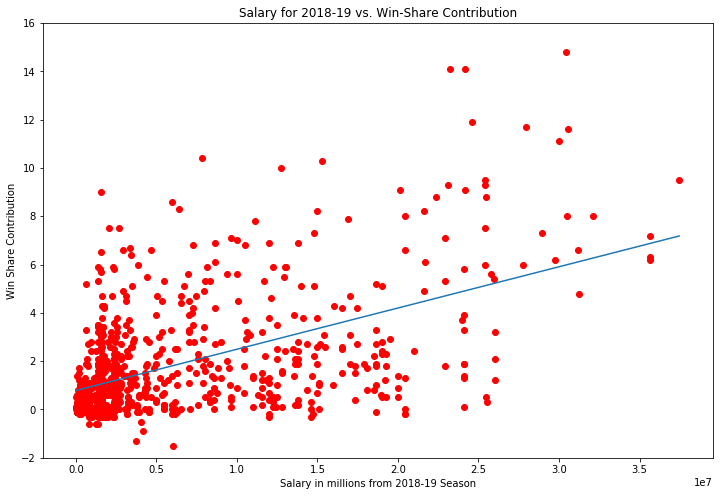

In [166]:
# Let's explore a scatter plot of WS to Salary

x = df_array.Salary
y = df_array.WS

_ = plt.figure(figsize = (12, 8))
_ = plt.title('Salary for 2018-19 vs. Win-Share Contribution')
_ = plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
_ = plt.scatter(x = x, y = y, color = 'red')
_ = plt.xlabel('Salary in millions from 2018-19 Season')
_ = plt.ylabel('Win Share Contribution')
_ = plt.ylim([-2, 16])

plt.show()

In [156]:
print('The correlation of salary to win share contribution for 2018-19 is: {}'.format(np.corrcoef(x, y)[0, 1]))


The correlation of salary to win share contribution for 2018-19 is: 0.535431578987


In [ ]:
x1 = array
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(x1, np.array([1, 2])) + 3
>>> reg = LinearRegression().fit(X, y)
>>> reg.score(X, y)
1.0
>>> reg.coef_
array([1., 2.])
>>> reg.intercept_ 
3.0000...
>>> reg.predict(np.array([[3, 5]]))
array([16.])

In [161]:
m = ols('Salary ~ WS',df_array).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     301.0
Date:                Tue, 28 May 2019   Prob (F-statistic):           6.14e-57
Time:                        17:38:44   Log-Likelihood:                -12834.
No. Observations:                 751   AIC:                         2.567e+04
Df Residuals:                     749   BIC:                         2.568e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.253e+06   2.96e+05     10.989      0.0

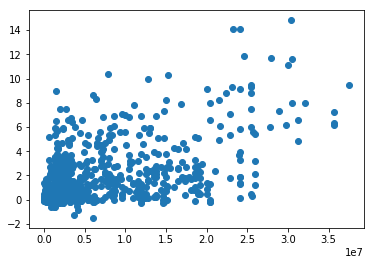

In [162]:
# Preprocessing Input data

X = df_array.iloc[:, 0]
Y = df_array.iloc[:, 1]
plt.scatter(X, Y)
plt.show()

In [163]:
# Building the model
X_mean = np.mean(X)
Y_mean = np.mean(Y)

num = 0
den = 0
for i in range(len(X)):
    num += (X[i] - X_mean)*(Y[i] - Y_mean)
    den += (X[i] - X_mean)**2
m = num / den
c = Y_mean - m * X_mean

print (m, c)

(1.707521095965662e-07, 0.78503755873845105)


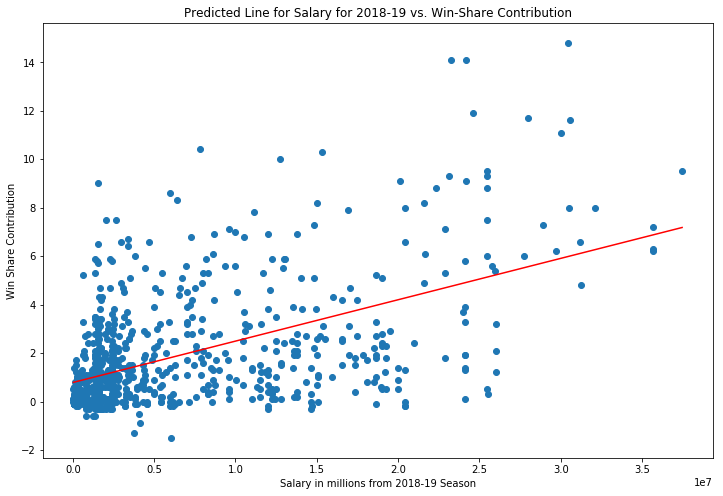

In [171]:
# Making predictions
Y_pred = m*X + c

_ = plt.figure(figsize = (12, 8))
_ = plt.scatter(X, Y) # actual
_ = plt.title('Predicted Line for Salary for 2018-19 vs. Win-Share Contribution')
_ = plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
_ = plt.xlabel('Salary in millions from 2018-19 Season')
_ = plt.ylabel('Win Share Contribution')

plt.show()